In [1]:
from collections import Counter
import pandas as pd
import numpy as np
from diive.core.io.files import save_parquet, load_parquet

# Read flux data

In [2]:
FILEPATH = r"../50_FluxProcessingChain/53.1_FluxProcessingChain_after-L3.3_NEE_LE_H.parquet"
maindf = load_parquet(filepath=FILEPATH)

Loaded .parquet file ../50_FluxProcessingChain/53.1_FluxProcessingChain_after-L3.3_NEE_LE_H.parquet (0.420 seconds). Detected time resolution of <30 * Minutes> / 30min 


# Read management data

In [3]:
file_mgmt = r"../0_data/MANAGEMENT/CH-CHA-Management_2005-2024_20241107.xlsx"
sheet = "CHA_Management"
df = pd.read_excel(file_mgmt, sheet_name=sheet)
df = df.loc[:, ['Parcel', 'Management_Category', 'Management_Subcategory', 'Management_specific', 'Start', 'End']]
df

,Parcel,Management_Category,Management_Subcategory,Management_specific,Start,End
0,A,Fertilization,Organic fertilizer,Manure,2001-01-15,NaT
1,A,Plant protection and growth maintenance,Herbe removal,Rumex removal,2001-03-30,NaT
2,A,Plant protection and growth maintenance,Harrowing,Harrowing (1 cm),2001-04-02,NaT
3,A,Use,Grazing,Cattle,2001-05-07,2001-05-15
4,A,Plant protection and growth maintenance,Rolling,NaN,2001-06-07,NaT
...,...,...,...,...,...,...
573,B,Fertilization,Organic fertilizer,Slurry,2024-06-27,2024-06-27
574,B,Use,Mowing,NaN,2024-07-17,2024-07-17
575,B,Fertilization,Organic fertilizer,Slurry,2024-08-07,2024-08-07
576,B,Use,Mowing,NaN,2024-08-22,2024-08-22


# Handle missing management info

In [4]:
# Fill end dates, if missing then end is the same as start
df['End'] = df['End'].fillna(df['Start'])
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

df['Parcel'] = df['Parcel'].fillna('-9999')
df['Management_Category'] = df['Management_Category'].fillna('-9999')
df['Management_Subcategory'] = df['Management_Subcategory'].fillna('-9999')
df['Management_specific'] = df['Management_specific'].fillna('-9999')

df

,Parcel,Management_Category,Management_Subcategory,Management_specific,Start,End
0,A,Fertilization,Organic fertilizer,Manure,2001-01-15,2001-01-15
1,A,Plant protection and growth maintenance,Herbe removal,Rumex removal,2001-03-30,2001-03-30
2,A,Plant protection and growth maintenance,Harrowing,Harrowing (1 cm),2001-04-02,2001-04-02
3,A,Use,Grazing,Cattle,2001-05-07,2001-05-15
4,A,Plant protection and growth maintenance,Rolling,-9999,2001-06-07,2001-06-07
...,...,...,...,...,...,...
573,B,Fertilization,Organic fertilizer,Slurry,2024-06-27,2024-06-27
574,B,Use,Mowing,-9999,2024-07-17,2024-07-17
575,B,Fertilization,Organic fertilizer,Slurry,2024-08-07,2024-08-07
576,B,Use,Mowing,-9999,2024-08-22,2024-08-22


# Create MGMT_specific names

In [5]:
df['PREFIX'] = 'MGMT'

df['Parcel'] = df['Parcel'].str.replace('A', 'PARCEL-A')
df['Parcel'] = df['Parcel'].str.replace('B', 'PARCEL-B')

df['Management_Category'] = df['Management_Category'].str.replace('Fertilization', 'FERT')
df['Management_Category'] = df['Management_Category'].str.replace('Plant protection and growth maintenance', 'PPGM')
df['Management_Category'] = df['Management_Category'].str.replace('Use', 'USE')
df['Management_Category'] = df['Management_Category'].str.replace('Sowing', 'SOWING')
df['Management_Category'] = df['Management_Category'].str.replace('Soil cultivation', 'SOILCULTIVATION')

df['Management_Subcategory'] = df['Management_Subcategory'].str.replace('Organic fertilizer', 'ORG')
df['Management_Subcategory'] = df['Management_Subcategory'].str.replace('Mineral fertilizer', 'MIN')
df['Management_Subcategory'] = df['Management_Subcategory'].str.replace('Herbe removal', 'HERBREMOVAL')
df['Management_Subcategory'] = df['Management_Subcategory'].str.replace('Harrowing', 'HARROWING')
df['Management_Subcategory'] = df['Management_Subcategory'].str.replace('Grazing', 'GRAZING')
df['Management_Subcategory'] = df['Management_Subcategory'].str.replace('Rolling', 'ROLLING')
df['Management_Subcategory'] = df['Management_Subcategory'].str.replace('Oversowing', 'OVERSOWING')
df['Management_Subcategory'] = df['Management_Subcategory'].str.replace('Mowing', 'MOWING')
df['Management_Subcategory'] = df['Management_Subcategory'].str.replace('Herbicide', 'HERBICIDE')
df['Management_Subcategory'] = df['Management_Subcategory'].str.replace('Ploughing', 'PLOUGHING')
df['Management_Subcategory'] = df['Management_Subcategory'].str.replace('Resowing', 'RESOWING')
df['Management_Subcategory'] = df['Management_Subcategory'].str.replace('Pesticide', 'PESTICIDE')
df['Management_Subcategory'] = df['Management_Subcategory'].str.replace('Tillage', 'TILLAGE')

df['Management_specific'] = df['Management_specific'].str.replace('Manure', 'MAN')
df['Management_specific'] = df['Management_specific'].str.replace('Slurry', 'SLU')
df['Management_specific'] = df['Management_specific'].str.replace('Calcium ammonium nitrate', 'CAN')
df['Management_specific'] = df['Management_specific'].str.replace('Molluscicide (applied on the whole field)', 'MOLLUSCICIDE')
df['Management_specific'] = df['Management_specific'].str.replace('Harmony tabs (applied on single plants against Rumex obtusifolius)', 'HARMONYTABS')
df['Management_specific'] = df['Management_specific'].str.replace('Ally Tabs (applied on single plants against Rumex spp.)', 'ALLYTABS')
df['Management_specific'] = df['Management_specific'].str.replace('Ally Tabs (applied against Rumex spp. and Senecio spp.)', 'ALLYTABS')
df['Management_specific'] = df['Management_specific'].str.replace('Hay', 'HAY')
df['Management_specific'] = df['Management_specific'].str.replace('Sheep', 'SHEEP')
df['Management_specific'] = df['Management_specific'].str.replace('Cattle', 'CATTLE')
df['Management_specific'] = df['Management_specific'].str.replace('Aftergrass', 'AFTERGRASS')
df['Management_specific'] = df['Management_specific'].str.replace('Asulox (applied on the whole field against Rumex obtusifolius)', 'ASULOX')
df['Management_specific'] = df['Management_specific'].str.replace('Rumex removal', 'RUMEX')
df['Management_specific'] = df['Management_specific'].str.replace('Harrowing (1 cm)', '1CM')
df['Management_specific'] = df['Management_specific'].str.replace('Harrowing (7 cm)', '7CM')
df['Management_specific'] = df['Management_specific'].str.replace('Roundup PowerMax', 'ROUNDUP')

df['Management_specific'] = df['Management_specific'].str.replace('Type OH 440 Extra', 'OH440EXTRA')
df['Management_specific'] = df['Management_specific'].str.replace('?', '-9999')
df['Management_specific'] = df['Management_specific'].str.replace('Type OH 440 RenoTurbo', 'OH440RENOTURBO')
df['Management_specific'] = df['Management_specific'].str.replace('Type OH 440 Reno', 'OH440RENO')
df['Management_specific'] = df['Management_specific'].str.replace('Type OH 240 Reno', 'OH240RENO')

df['Management_specific'] = df['Management_specific'].str.replace('Asulam (applied on the whole field against Rumex obtusifolius)', 'ASULAM')
# df['Management_specific'] = df['Management_specific'].str.replace('HEBE FIONA MERULA. Sorte HEBE: Trifolium repens (small leaves). Sorte FIONA: Trifolium repens (big leaves). Sorte MARULA: Trifolium pratense. Total 20 kg/ha. Mixture: 27% HEBE  36% FIONA 36% MERULA (15 kg + 20 kg + 20 kg)', '-9999')

df['Management_specific'] = df['Management_specific'].str.replace('Grass silage', 'GRASSSILAGE')
df['Management_specific'] = df['Management_specific'].str.replace('UFA 420', 'UFA-420')

s = "HEBE FIONA MERULA. Sorte HEBE: Trifolium repens (small leaves). Sorte FIONA: Trifolium repens (big leaves). Sorte MERULA: Trifolium pratense. Total 20 kg/ha. Mixture: 1/4 HEBE  1/2 FIONA 1/4 MERULA"
df['Management_specific'] = df['Management_specific'].str.replace(s, 'HEBE-FIONA-MERULA')

s = "HEBE FIONA MERULA. Sorte HEBE: Trifolium repens (small leaves). Sorte FIONA: Trifolium repens (big leaves). Sorte MARULA: Trifolium pratense. Total 20 kg/ha. Mixture: 27% HEBE  36% FIONA 36% MERULA (15 kg + 20 kg + 20 kg)"
df['Management_specific'] = df['Management_specific'].str.replace(s, 'HEBE-FIONA-MERULA')

s = "Type OH (HEBE FIONA TEDI). Trifolium pratense 4n Sorte TEDI - Trifolium repens Sorte HEBE - Trifolium repens Sorte FIONA. Total 200 g/a of each 1/3"
df['Management_specific'] = df['Management_specific'].str.replace(s, 'HEBE-FIONA-TEDI')

df['Management_specific'] = df['Management_specific'].str.replace('Hobelsaat (tillage until 3-4 cm)', '3-4CM')
df['Management_specific'] = df['Management_specific'].str.replace('XXX', 'XXX')
df['Management_specific'] = df['Management_specific'].str.replace('XXX', 'XXX')

def create_varname(row): 
    return "_".join([
        row['PREFIX'],        
        row['Management_Category'], 
        row['Management_Subcategory'],
        str(row['Management_specific']),
        # row['Parcel']
    ])

df['MGMT_SPECIFIC'] = df.apply(create_varname, axis=1)
df['MGMT_SPECIFIC'] = df['MGMT_SPECIFIC'].str.replace('_-9999', '')
mgmt_types = df['MGMT_SPECIFIC'].unique()
print("Unique specific managements:")
[print(f"{ix}: {v}") for ix, v in enumerate(mgmt_types)];

Unique specific managements:
0: MGMT_FERT_ORG_MAN
1: MGMT_PPGM_HERBREMOVAL_RUMEX
2: MGMT_PPGM_HARROWING_1CM
3: MGMT_USE_GRAZING_CATTLE
4: MGMT_PPGM_ROLLING
5: MGMT_PPGM_HARROWING_7CM
6: MGMT_SOWING_OVERSOWING_OH440RENO
7: MGMT_USE_MOWING_GRASSSILAGE
8: MGMT_FERT_MIN_CAN
9: MGMT_FERT_ORG_SLU
10: MGMT_USE_GRAZING_SHEEP
11: MGMT_SOWING_OVERSOWING_OH440EXTRA
12: MGMT_USE_MOWING_AFTERGRASS
13: MGMT_PPGM_HERBICIDE_ASULOX
14: MGMT_SOILCULTIVATION_ROLLING
15: MGMT_USE_MOWING_HAY
16: MGMT_SOWING_OVERSOWING_OH440RENOTURBO
17: MGMT_SOWING_OVERSOWING_OH240RENO
18: MGMT_PPGM_HERBICIDE_ALLYTABS
19: MGMT_SOILCULTIVATION_PLOUGHING
20: MGMT_SOILCULTIVATION_HARROWING_7CM
21: MGMT_SOWING_RESOWING_OH440EXTRA
22: MGMT_PPGM_PESTICIDE_MOLLUSCICIDE
23: MGMT_PPGM_HERBICIDE_HARMONYTABS
24: MGMT_PPGM_HERBICIDE_ASULAM
25: MGMT_SOWING_OVERSOWING_HEBE-FIONA-TEDI
26: MGMT_SOILCULTIVATION_HARROWING_1CM
27: MGMT_USE_MOWING
28: MGMT_SOWING_OVERSOWING_HEBE-FIONA-MERULA
29: MGMT_PPGM_HERBICIDE_ROUNDUP
30: MGMT_SOILCULTIV

In [6]:
display(df)

,Parcel,Management_Category,Management_Subcategory,Management_specific,Start,End,PREFIX,MGMT_SPECIFIC
0,PARCEL-A,FERT,ORG,MAN,2001-01-15,2001-01-15,MGMT,MGMT_FERT_ORG_MAN
1,PARCEL-A,PPGM,HERBREMOVAL,RUMEX,2001-03-30,2001-03-30,MGMT,MGMT_PPGM_HERBREMOVAL_RUMEX
2,PARCEL-A,PPGM,HARROWING,1CM,2001-04-02,2001-04-02,MGMT,MGMT_PPGM_HARROWING_1CM
3,PARCEL-A,USE,GRAZING,CATTLE,2001-05-07,2001-05-15,MGMT,MGMT_USE_GRAZING_CATTLE
4,PARCEL-A,PPGM,ROLLING,-9999,2001-06-07,2001-06-07,MGMT,MGMT_PPGM_ROLLING
...,...,...,...,...,...,...,...,...
573,PARCEL-B,FERT,ORG,SLU,2024-06-27,2024-06-27,MGMT,MGMT_FERT_ORG_SLU
574,PARCEL-B,USE,MOWING,-9999,2024-07-17,2024-07-17,MGMT,MGMT_USE_MOWING
575,PARCEL-B,FERT,ORG,SLU,2024-08-07,2024-08-07,MGMT,MGMT_FERT_ORG_SLU
576,PARCEL-B,USE,MOWING,-9999,2024-08-22,2024-08-22,MGMT,MGMT_USE_MOWING


# Counts of MGMT_SPECIFIC names

In [7]:
counts = Counter(df['MGMT_SPECIFIC'])
# [print(f"{ix}: {c}") for ix, c in enumerate(counts)]
# list(counts.values())
# for e, c in counts.items():
    # print(f"{e}: {c}")
counts_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
rename_dict = {'index': 'MGMT_SPECIFIC', 0: 'COUNTS'}
counts_df = counts_df.rename(columns=rename_dict, inplace=False)
counts_df = counts_df.sort_values(by='COUNTS', ascending=False)
counts_df.to_csv("management_consolidation.csv", index=False)
counts_df

,MGMT_SPECIFIC,COUNTS
9,MGMT_FERT_ORG_SLU,190
7,MGMT_USE_MOWING_GRASSSILAGE,134
10,MGMT_USE_GRAZING_SHEEP,60
27,MGMT_USE_MOWING,41
12,MGMT_USE_MOWING_AFTERGRASS,36
15,MGMT_USE_MOWING_HAY,17
6,MGMT_SOWING_OVERSOWING_OH440RENO,12
3,MGMT_USE_GRAZING_CATTLE,8
2,MGMT_PPGM_HARROWING_1CM,8
0,MGMT_FERT_ORG_MAN,7


# Create MGMT variable names

In [8]:
df['_TEMP'] = ''
df['MGMT'] = ''

def rename(startswith, replacewith):
    
    locs = df['MGMT_SPECIFIC'].str.startswith(startswith)

    df.loc[locs, '_TEMP'] = replacewith
    df.loc[locs, 'MGMT'] = replacewith + "_" + df.loc[locs, 'Parcel']
    display(df[locs].head(1))   
    print(f"Records: {len(df[locs])}")

rename(startswith="MGMT_USE_MOWING", replacewith="MGMT_MOWING")

rename(startswith="MGMT_USE_GRAZING", replacewith="MGMT_GRAZING")

rename(startswith="MGMT_SOWING", replacewith="MGMT_SOWING")

rename(startswith="MGMT_SOILCULTIVATION", replacewith="MGMT_SOILCULTIVATION")
rename(startswith="MGMT_PPGM_HARROWING", replacewith="MGMT_SOILCULTIVATION")
rename(startswith="MGMT_PPGM_ROLLING", replacewith="MGMT_SOILCULTIVATION")

rename(startswith="MGMT_PPGM_PESTICIDE", replacewith="MGMT_PESTICIDE_HERBICIDE")
rename(startswith="MGMT_PPGM_HERBREMOVAL", replacewith="MGMT_PESTICIDE_HERBICIDE")
rename(startswith="MGMT_PPGM_HERBICIDE", replacewith="MGMT_PESTICIDE_HERBICIDE")

rename(startswith="MGMT_FERT_ORG", replacewith="MGMT_FERT_ORG")
rename(startswith="MGMT_FERT_MIN", replacewith="MGMT_FERT_MIN")

,Parcel,Management_Category,Management_Subcategory,Management_specific,Start,End,PREFIX,MGMT_SPECIFIC,_TEMP,MGMT
7,PARCEL-A,USE,MOWING,GRASSSILAGE,2001-07-25,2001-07-25,MGMT,MGMT_USE_MOWING_GRASSSILAGE,MGMT_MOWING,MGMT_MOWING_PARCEL-A


Records: 228


,Parcel,Management_Category,Management_Subcategory,Management_specific,Start,End,PREFIX,MGMT_SPECIFIC,_TEMP,MGMT
3,PARCEL-A,USE,GRAZING,CATTLE,2001-05-07,2001-05-15,MGMT,MGMT_USE_GRAZING_CATTLE,MGMT_GRAZING,MGMT_GRAZING_PARCEL-A


Records: 68


,Parcel,Management_Category,Management_Subcategory,Management_specific,Start,End,PREFIX,MGMT_SPECIFIC,_TEMP,MGMT
6,PARCEL-A,SOWING,OVERSOWING,OH440RENO,2001-06-07,2001-06-07,MGMT,MGMT_SOWING_OVERSOWING_OH440RENO,MGMT_SOWING,MGMT_SOWING_PARCEL-A


Records: 27


,Parcel,Management_Category,Management_Subcategory,Management_specific,Start,End,PREFIX,MGMT_SPECIFIC,_TEMP,MGMT
139,PARCEL-B,SOILCULTIVATION,ROLLING,-9999,2006-03-27,2006-03-27,MGMT,MGMT_SOILCULTIVATION_ROLLING,MGMT_SOILCULTIVATION,MGMT_SOILCULTIVATION_PARCEL-B


Records: 16


,Parcel,Management_Category,Management_Subcategory,Management_specific,Start,End,PREFIX,MGMT_SPECIFIC,_TEMP,MGMT
2,PARCEL-A,PPGM,HARROWING,1CM,2001-04-02,2001-04-02,MGMT,MGMT_PPGM_HARROWING_1CM,MGMT_SOILCULTIVATION,MGMT_SOILCULTIVATION_PARCEL-A


Records: 9


,Parcel,Management_Category,Management_Subcategory,Management_specific,Start,End,PREFIX,MGMT_SPECIFIC,_TEMP,MGMT
4,PARCEL-A,PPGM,ROLLING,-9999,2001-06-07,2001-06-07,MGMT,MGMT_PPGM_ROLLING,MGMT_SOILCULTIVATION,MGMT_SOILCULTIVATION_PARCEL-A


Records: 3


,Parcel,Management_Category,Management_Subcategory,Management_specific,Start,End,PREFIX,MGMT_SPECIFIC,_TEMP,MGMT
306,PARCEL-A,PPGM,PESTICIDE,MOLLUSCICIDE,2012-06-19,2012-06-19,MGMT,MGMT_PPGM_PESTICIDE_MOLLUSCICIDE,MGMT_PESTICIDE_HERBICIDE,MGMT_PESTICIDE_HERBICIDE_PARCEL-A


Records: 2


,Parcel,Management_Category,Management_Subcategory,Management_specific,Start,End,PREFIX,MGMT_SPECIFIC,_TEMP,MGMT
1,PARCEL-A,PPGM,HERBREMOVAL,RUMEX,2001-03-30,2001-03-30,MGMT,MGMT_PPGM_HERBREMOVAL_RUMEX,MGMT_PESTICIDE_HERBICIDE,MGMT_PESTICIDE_HERBICIDE_PARCEL-A


Records: 3


,Parcel,Management_Category,Management_Subcategory,Management_specific,Start,End,PREFIX,MGMT_SPECIFIC,_TEMP,MGMT
70,PARCEL-B,PPGM,HERBICIDE,ASULOX,2003-09-22,2003-09-22,MGMT,MGMT_PPGM_HERBICIDE_ASULOX,MGMT_PESTICIDE_HERBICIDE,MGMT_PESTICIDE_HERBICIDE_PARCEL-B


Records: 18


,Parcel,Management_Category,Management_Subcategory,Management_specific,Start,End,PREFIX,MGMT_SPECIFIC,_TEMP,MGMT
0,PARCEL-A,FERT,ORG,MAN,2001-01-15,2001-01-15,MGMT,MGMT_FERT_ORG_MAN,MGMT_FERT_ORG,MGMT_FERT_ORG_PARCEL-A


Records: 197


,Parcel,Management_Category,Management_Subcategory,Management_specific,Start,End,PREFIX,MGMT_SPECIFIC,_TEMP,MGMT
8,PARCEL-A,FERT,MIN,CAN,2001-08-06,2001-08-06,MGMT,MGMT_FERT_MIN_CAN,MGMT_FERT_MIN,MGMT_FERT_MIN_PARCEL-A


Records: 7


In [9]:
df

,Parcel,Management_Category,Management_Subcategory,Management_specific,Start,End,PREFIX,MGMT_SPECIFIC,_TEMP,MGMT
0,PARCEL-A,FERT,ORG,MAN,2001-01-15,2001-01-15,MGMT,MGMT_FERT_ORG_MAN,MGMT_FERT_ORG,MGMT_FERT_ORG_PARCEL-A
1,PARCEL-A,PPGM,HERBREMOVAL,RUMEX,2001-03-30,2001-03-30,MGMT,MGMT_PPGM_HERBREMOVAL_RUMEX,MGMT_PESTICIDE_HERBICIDE,MGMT_PESTICIDE_HERBICIDE_PARCEL-A
2,PARCEL-A,PPGM,HARROWING,1CM,2001-04-02,2001-04-02,MGMT,MGMT_PPGM_HARROWING_1CM,MGMT_SOILCULTIVATION,MGMT_SOILCULTIVATION_PARCEL-A
3,PARCEL-A,USE,GRAZING,CATTLE,2001-05-07,2001-05-15,MGMT,MGMT_USE_GRAZING_CATTLE,MGMT_GRAZING,MGMT_GRAZING_PARCEL-A
4,PARCEL-A,PPGM,ROLLING,-9999,2001-06-07,2001-06-07,MGMT,MGMT_PPGM_ROLLING,MGMT_SOILCULTIVATION,MGMT_SOILCULTIVATION_PARCEL-A
...,...,...,...,...,...,...,...,...,...,...
573,PARCEL-B,FERT,ORG,SLU,2024-06-27,2024-06-27,MGMT,MGMT_FERT_ORG_SLU,MGMT_FERT_ORG,MGMT_FERT_ORG_PARCEL-B
574,PARCEL-B,USE,MOWING,-9999,2024-07-17,2024-07-17,MGMT,MGMT_USE_MOWING,MGMT_MOWING,MGMT_MOWING_PARCEL-B
575,PARCEL-B,FERT,ORG,SLU,2024-08-07,2024-08-07,MGMT,MGMT_FERT_ORG_SLU,MGMT_FERT_ORG,MGMT_FERT_ORG_PARCEL-B
576,PARCEL-B,USE,MOWING,-9999,2024-08-22,2024-08-22,MGMT,MGMT_USE_MOWING,MGMT_MOWING,MGMT_MOWING_PARCEL-B


In [10]:
print("Check for missing management info:")
df.isnull().sum()

Check for missing management info:


Parcel                    0
Management_Category       0
Management_Subcategory    0
Management_specific       0
Start                     0
End                       0
PREFIX                    0
MGMT_SPECIFIC             0
_TEMP                     0
MGMT                      0
dtype: int64

In [16]:
mgmt_types_simplified = df['MGMT'].unique()
mgmt_types_simplified

array(['MGMT_FERT_ORG_PARCEL-A', 'MGMT_PESTICIDE_HERBICIDE_PARCEL-A',
       'MGMT_SOILCULTIVATION_PARCEL-A', 'MGMT_GRAZING_PARCEL-A',
       'MGMT_SOWING_PARCEL-A', 'MGMT_MOWING_PARCEL-A',
       'MGMT_FERT_MIN_PARCEL-A', 'MGMT_FERT_ORG_PARCEL-B',
       'MGMT_SOILCULTIVATION_PARCEL-B', 'MGMT_MOWING_PARCEL-B',
       'MGMT_PESTICIDE_HERBICIDE_PARCEL-B', 'MGMT_GRAZING_PARCEL-B',
       'MGMT_SOWING_PARCEL-B', 'MGMT_FERT_MIN_PARCEL-B'], dtype=object)

In [25]:
counts = Counter(df['MGMT'])
# [print(f"{ix}: {c}") for ix, c in enumerate(counts)]
# list(counts.values())
# for e, c in counts.items():
    # print(f"{e}: {c}")
counts_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
rename_dict = {'index': 'MGMT', 0: 'COUNTS'}
counts_df = counts_df.rename(columns=rename_dict, inplace=False)
counts_df = counts_df.sort_values(by='COUNTS', ascending=False)
counts_df.to_csv("management_simplified_counts.csv", index=False)
counts_df

,MGMT,COUNTS
9,MGMT_MOWING_PARCEL-B,118
0,MGMT_FERT_ORG_PARCEL-A,112
5,MGMT_MOWING_PARCEL-A,110
7,MGMT_FERT_ORG_PARCEL-B,85
11,MGMT_GRAZING_PARCEL-B,35
3,MGMT_GRAZING_PARCEL-A,33
12,MGMT_SOWING_PARCEL-B,21
8,MGMT_SOILCULTIVATION_PARCEL-B,17
10,MGMT_PESTICIDE_HERBICIDE_PARCEL-B,12
1,MGMT_PESTICIDE_HERBICIDE_PARCEL-A,11


# Create empty management dataframe with full timestamp index from main data

In [17]:
mgmt = pd.DataFrame(index=maindf.index, columns=[mgmt_types_simplified])
mgmt

,MGMT_FERT_ORG_PARCEL-A,MGMT_PESTICIDE_HERBICIDE_PARCEL-A,MGMT_SOILCULTIVATION_PARCEL-A,MGMT_GRAZING_PARCEL-A,MGMT_SOWING_PARCEL-A,MGMT_MOWING_PARCEL-A,MGMT_FERT_MIN_PARCEL-A,MGMT_FERT_ORG_PARCEL-B,MGMT_SOILCULTIVATION_PARCEL-B,MGMT_MOWING_PARCEL-B,MGMT_PESTICIDE_HERBICIDE_PARCEL-B,MGMT_GRAZING_PARCEL-B,MGMT_SOWING_PARCEL-B,MGMT_FERT_MIN_PARCEL-B
TIMESTAMP_MIDDLE,,,,,,,,,,,,,,
2005-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 01:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 01:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 02:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 21:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-31 22:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-31 22:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Collect MGMT with start and end date indices

In [18]:
for ix, event in df.iterrows():
    varname = event['MGMT']
    start = event['Start']
    end = event['End']
    # print(varname, start, end)
    locs = (mgmt.index >= start) & (mgmt.index <= end)
    mgmt.loc[locs, varname] = 1

# mgmt = mgmt.fillna(0)

In [19]:
mgmt.describe()

,MGMT_FERT_ORG_PARCEL-A,MGMT_PESTICIDE_HERBICIDE_PARCEL-A,MGMT_SOILCULTIVATION_PARCEL-A,MGMT_GRAZING_PARCEL-A,MGMT_SOWING_PARCEL-A,MGMT_MOWING_PARCEL-A,MGMT_FERT_MIN_PARCEL-A,MGMT_FERT_ORG_PARCEL-B,MGMT_SOILCULTIVATION_PARCEL-B,MGMT_MOWING_PARCEL-B,MGMT_PESTICIDE_HERBICIDE_PARCEL-B,MGMT_GRAZING_PARCEL-B,MGMT_SOWING_PARCEL-B,MGMT_FERT_MIN_PARCEL-B
count,265,0,0,10321,0,2083,0,240,5,2003,0,11401,7,0
unique,1,0,0,1,0,1,0,1,1,1,0,1,1,0
top,1,NaN,NaN,1,NaN,1,NaN,1,1,1,NaN,1,1,NaN
freq,265,NaN,NaN,10321,NaN,2083,NaN,240,5,2003,NaN,11401,7,NaN


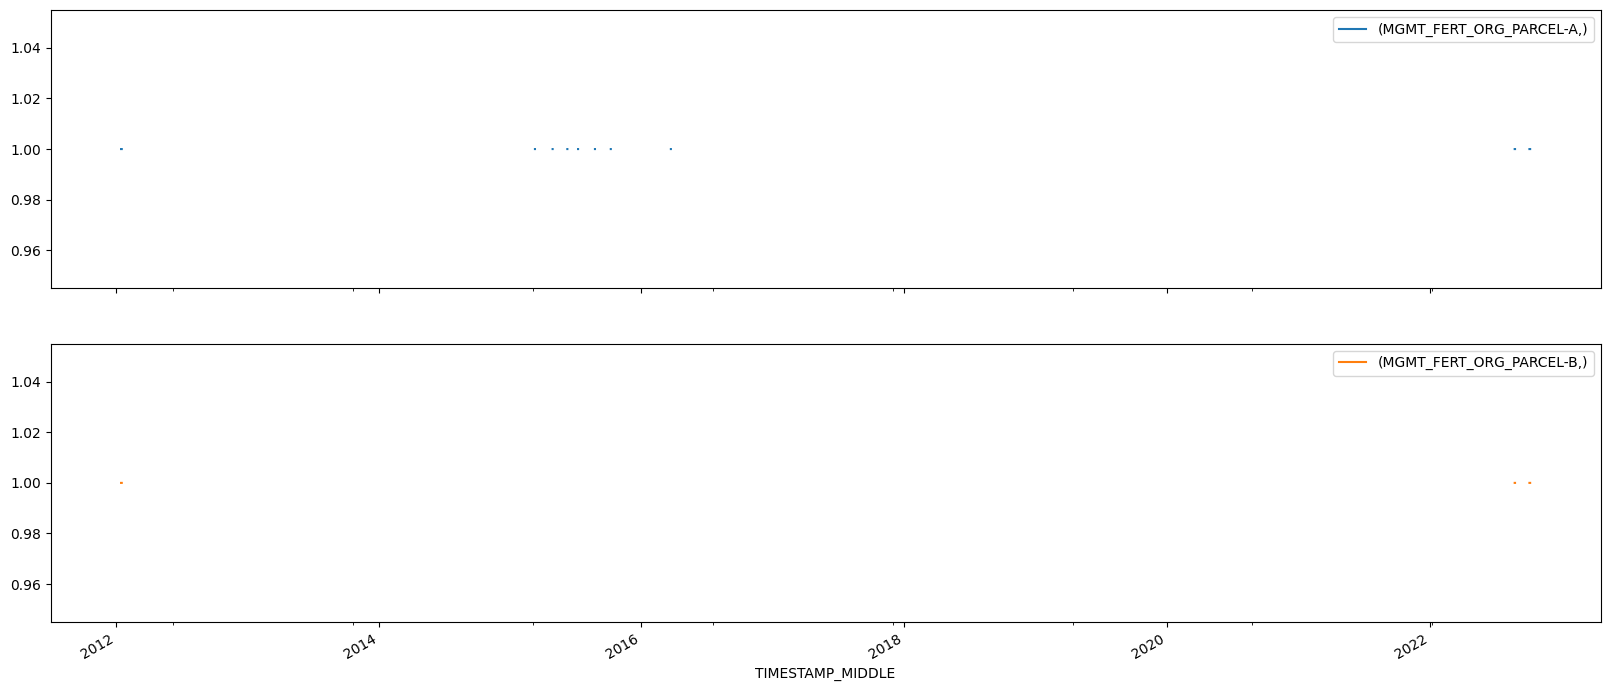

In [23]:
mgmt[['MGMT_FERT_ORG_PARCEL-A', 'MGMT_FERT_ORG_PARCEL-B']].plot(x_compat=True, subplots=True, figsize=(20, 9));

In [24]:
mgmt[['MGMT_FERT_ORG_PARCEL-A', 'MGMT_FERT_ORG_PARCEL-B']].describe()

,MGMT_FERT_ORG_PARCEL-A,MGMT_FERT_ORG_PARCEL-B
count,265,240
unique,1,1
top,1,1
freq,265,240


In [ ]:
categories = df['Management_Category'].unique()
[print(ix, c) for ix, c in enumerate(categories)];